In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
df = pd.read_csv("train_AV3.csv")

In [2]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data cleaning

In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [5]:
df["Gender"].fillna("Male", inplace=True)

In [6]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [7]:
df["Married"].fillna("Yes", inplace=True)

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df["Dependents"].fillna("0", inplace=True)

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df["Self_Employed"].fillna("No", inplace=True)

In [12]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

In [13]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df["Loan_Amount_Term"].fillna(360.0, inplace=True)

In [15]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
df["Credit_History"].fillna(1.0, inplace=True)

In [17]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['Gender1'] = label_encoder.fit_transform(df['Gender'])
df['Married1'] = label_encoder.fit_transform(df['Married'])
df['Education1'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed1'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area1'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status1'] = label_encoder.fit_transform(df['Loan_Status'])

In [19]:
df['Dependents1'] = label_encoder.fit_transform(df['Dependents'])

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender1,Married1,Education1,Self_Employed1,Property_Area1,Loan_Status1,Dependents1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,2,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,1,2,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,2,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0,0,0,0,0,1,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,1,1,0,0,0,1,3
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,1,1,0,0,2,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,1,1,0,0,2,1,2


# Support Vector Machine

In [21]:
X = df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status1','Loan_Status'], axis=1)
Y = df["Loan_Status1"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [22]:
from sklearn.svm import SVC
model = SVC()

In [23]:
model.fit(X_train, y_train)
s=model.score(X_test, y_test)
s

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7297297297297297

# K Nearest Neighbours

In [24]:
df=df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'], axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Loan_Status1',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_features = scaler.transform(df.drop('Loan_Status1',axis=1))
scaled_features

array([[ 0.07299082, -0.55448733,  0.        , ..., -0.39260074,
         1.22329839, -0.73780632],
       [-0.13441195, -0.03873155, -0.21927331, ..., -0.39260074,
        -1.31851281,  0.25346957],
       [-0.39374734, -0.55448733, -0.957641  , ...,  2.54711697,
         1.22329839, -0.73780632],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121, ..., -0.39260074,
         1.22329839,  0.25346957],
       [ 0.35706382, -0.55448733,  0.4833669 , ..., -0.39260074,
         1.22329839,  1.24474546],
       [-0.13441195, -0.55448733, -0.15972753, ...,  2.54711697,
        -0.04760721, -0.73780632]])

In [27]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender1,Married1,Education1,Self_Employed1,Property_Area1,Loan_Status1
0,0.072991,-0.554487,0.000000,0.273231,0.411733,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806
1,-0.134412,-0.038732,-0.219273,0.273231,0.411733,0.472343,0.728816,-0.528362,-0.392601,-1.318513,0.253470
2,-0.393747,-0.554487,-0.957641,0.273231,0.411733,0.472343,0.728816,-0.528362,2.547117,1.223298,-0.737806
3,-0.462062,0.251980,-0.314547,0.273231,0.411733,0.472343,0.728816,1.892641,-0.392601,1.223298,-0.737806
4,0.097728,-0.554487,-0.064454,0.273231,0.411733,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-2.117107,-1.372089,-0.528362,-0.392601,-1.318513,-0.737806
610,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,0.472343,0.728816,-0.528362,-0.392601,-1.318513,2.236021
611,0.437174,-0.472404,1.269371,0.273231,0.411733,0.472343,0.728816,-0.528362,-0.392601,1.223298,0.253470
612,0.357064,-0.554487,0.483367,0.273231,0.411733,0.472343,0.728816,-0.528362,-0.392601,1.223298,1.244745


In [28]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status1'],
                                                    test_size=0.3)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status1'],cv=10)
    accuracy_rate.append(score.mean())

In [31]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status1'],cv=10)
    error_rate.append(1-score.mean())

Text(0,0.5,'Error Rate')

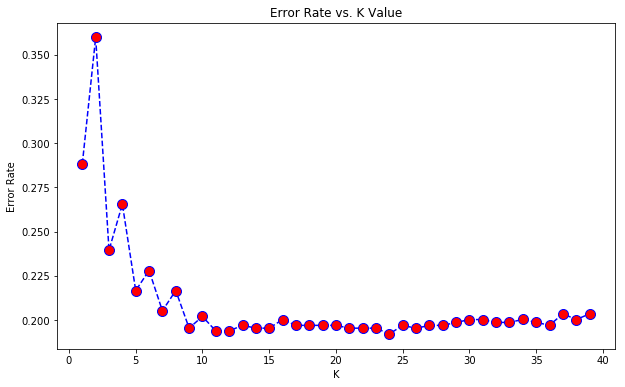

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')

WITH K=11


[[ 23  38]
 [  3 121]]




In [34]:
k=knn.score(X_test,y_test)
k

0.7783783783783784

# Decision Tree

In [35]:
X = df.drop(['Loan_Status1'], axis=1)
Y = df["Loan_Status1"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
dt=model.score(X_test,y_test)
dt

0.7513513513513513

# Logistic Regression

In [38]:
X = df.drop(['Loan_Status1'], axis=1)
Y = df["Loan_Status1"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0) 


In [39]:
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test) 

In [40]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, y_train) 

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = classifier.predict(xtest)
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred))
lr=accuracy_score(y_test, y_pred)

[[ 22  29]
 [  2 132]]
Accuracy :  0.8324324324324325


In [42]:
results = []
names = ['Logistic Regression','Support Vector Machine','K Nearest Neighbour','Decision tree']
results.append(lr)
results.append(s)
results.append(k)
results.append(dt)
results

[0.8324324324324325,
 0.7297297297297297,
 0.7783783783783784,
 0.7513513513513513]

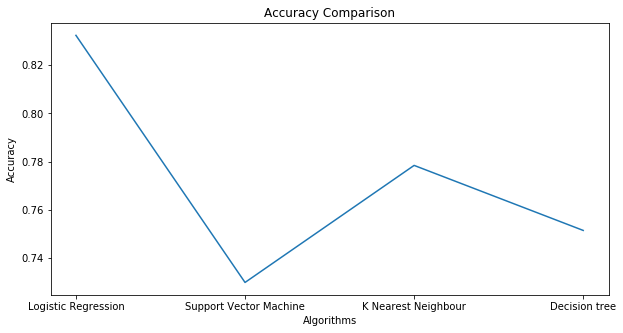

In [43]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(10, 5))
plt.plot(names, results)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()